# PINN (single)

In [ ]:
from setproctitle import setproctitle
setproctitle("PINN (single)")

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2"

import time
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path

## HMI

In [ ]:
b_bottom_path = os.path.expanduser('~/workspace/_data/NOAA12673/b_bottom/b_bottom_20170904_000000.npy')
Nz = 160
spatial_norm = 160
b_norm = 2500

b_bottom_date = os.path.basename(b_bottom_path)[9:-4]
output_path = os.path.join(Path(b_bottom_path).parent.parent, f'PINN/{b_bottom_date}')

## LowLou

In [ ]:
# b_bottom_path = os.path.expanduser('~/workspace/_data/lowlou_64_64_64/b_bottom.npy')
# Nz = 64
# spatial_norm = 32
# b_norm = 100

# output_path = os.path.join(Path(b_bottom_path).parent, 'PINN')

In [ ]:
with open(b_bottom_path, 'rb') as f:
    b_bottom = np.load(f)

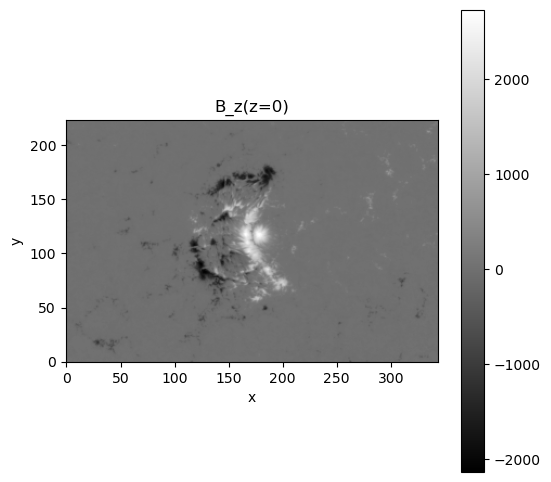

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower', cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [ ]:
Nx, Ny, _ = b_bottom.shape

In [ ]:
total_iterations = 10000
log_interval = 1000

num_neurons = 256
num_layers = 8

w_ff = 1
w_div = 1
# w_bc_init = 1000
decay_iterations = 25000

# lr_init = 5e-4
# lr_final = 5e-5
# lr_decay_iterations = 50000

batch_size = 10000
num_worker = 2

In [ ]:
from cmspinn.pinn_nf2_old import NF2Trainer

In [ ]:
trainer = NF2Trainer(output_path, b_bottom, Nz, spatial_norm, b_norm,
                     meta_path=None, dim=num_neurons, w_div=w_div, w_ff=w_ff,
                     decay_iterations=decay_iterations)

Configuration:
dim: 256, w_div: 1.000000, w_ff: 1.000000, decay_iterations: 25000, potential: True, vector_potential: False, 
Using device: cuda (gpus 1) ['NVIDIA RTX A6000']
Potential Boundary: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]
Resuming training from iteration 1000


In [ ]:
start = time.time()

trainer.train(total_iterations, batch_size, log_interval, log_interval, num_workers=num_worker)

runtime = time.time() - start
trainer.logger.info(f'Runtime --> total: {runtime:.2f}sec ({(runtime/(total_iterations-1)*1000):.2f}ms/iter.)')

Runtime --> total: 0.00sec (0.00ms/iter.)


Training already finished!


In [ ]:
with open(os.path.join(output_path, 'losses.npy'), "rb") as f:
    losses = np.load(f)

Text(0, 0.5, 'Loss')

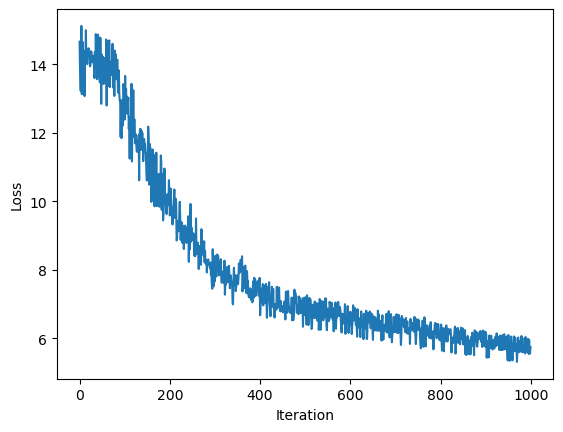

In [ ]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [ ]:
with open(os.path.join(output_path, 'losses_no_weight.npy'), "rb") as f:
    losses_no_weight = np.load(f)

Text(0, 0.5, 'Loss (no weight)')

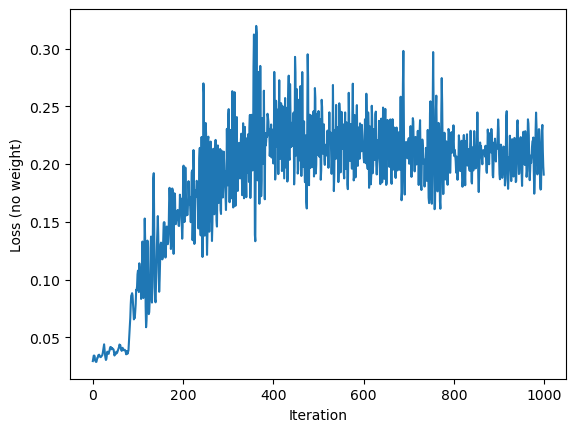

In [ ]:
plt.plot(losses_no_weight)
plt.xlabel('Iteration')
plt.ylabel('Loss (no weight)')